In [39]:
import numpy as np

def generate_corners(bottom_left, top_right, stride):
    corners = []
    bl_x, bl_y = bottom_left
    tr_x, tr_y = top_right

    while (tr_x - bl_x) >= stride and (tr_y - bl_y) >= stride:
        corners.append((bl_x-stride, bl_y))
        corners.append((tr_x, bl_y))
        corners.append((tr_x, tr_y))
        corners.append((bl_x, tr_y))

        # Move to the next inner rectangle
        bl_x += stride
        bl_y += stride
        tr_x -= stride
        tr_y -= stride

    bl_x, bl_y = bottom_left
    tr_x, tr_y = top_right
    corners[0] = bottom_left
    corners.append((corners[-1][0], (bl_y+tr_y)/2))
    corners.append(((bl_x+tr_x)/2, (bl_y+tr_y)/2))
    return corners


In [49]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

def plot(corners, percentage):
    corners = np.array(corners)
    fig, ax = plt.subplots()

    segments = [corners[i:i+2] for i in range(len(corners)-1)]
    for segment in segments:
        ax.plot([segment[0][0], segment[1][0]], [segment[0][1], segment[1][1]],
                linewidth=18, color='pink')


    ax.plot(
        [0.75, 2.25, 2.25, 0.75, 0.75],
        [0.75, 0.75, 2.25, 2.25, 0.75],
        linewidth=1, color='red'
    )

    ax.grid()
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f"{percentage}% covererage")
    ax.set_xlabel("X Coordinate (m)")
    ax.set_ylabel("Y Coordinate (m)")
    plt.show()

In [50]:
# Example usage
corners100 = generate_corners((0.75, 0.75), (2.25,2.25), 0.2)
corners50 = generate_corners((0.75, 0.75), (2.25,2.25), 0.4)

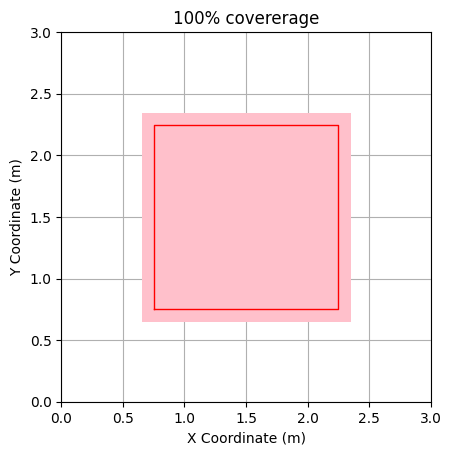

In [51]:
plot(corners100, 100)

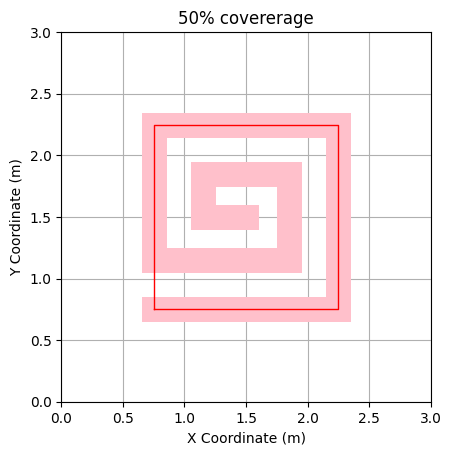

In [52]:
plot(corners50, 50)

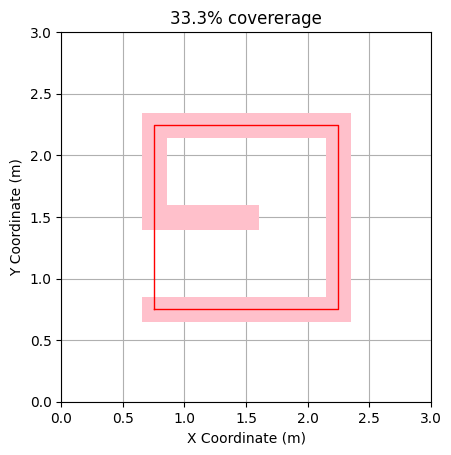

In [54]:
corners33 = generate_corners((0.75, 0.75), (2.25,2.25), 0.6)
plot(corners33, 33.3)

In [31]:
def slide_free_waypoints(waypoints):
# Convert to numpy array for easier manipulation
    waypoints = np.array(waypoints)
    new_waypoints = []

    for i in range(len(waypoints)):
        if i == 0:
            # Initial waypoint with initial orientation (0 radians)
            new_waypoints.append([waypoints[i][0], waypoints[i][1], 0.0])
        else:
            # Calculate orientation to this waypoint from the previous one
            dx = waypoints[i][0] - waypoints[i-1][0]
            dy = waypoints[i][1] - waypoints[i-1][1]
            theta = np.arctan2(dy, dx)

            # Add a waypoint for rotation
            new_waypoints.append([waypoints[i-1][0], waypoints[i-1][1], theta])

            # Add a waypoint for moving forward
            new_waypoints.append([waypoints[i][0], waypoints[i][1], theta])

    return new_waypoints

waypoints = slide_free_waypoints(corners)
with open("waypoints.txt", 'w') as f:
    for waypoint in waypoints:
        f.write(",".join([str(f) for f in waypoint])+'\n')

guarantee

In [ ]:
c = 1.1
e = 1.5
W = 0.2
t_0 = 1
v_max = 0.15
v_min = 0.09
w_max = 2.448
w_min = 0.7347
lam = 2

In [ ]:
import math
s = W/c
m = max(math.floor(e/(2*s)),1)
n = 8*m
d = m*(e-(m-1)*s)
theta = m*2*math.pi

t_min = d/v_max + theta/w_max + n*t_0
t_max = lam*d/v_min + lam*theta/w_min + n*t_0
round(t_min, 3), round(t_max, 3)